In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, zscore

# Sample DataFrame (replace with your actual df)
df = pd.DataFrame({
    'Race_Wins': np.random.randint(0, 100, 100),
    'Win_Rate': np.random.uniform(0, 1, 100),
    'Points_Per_Entry': np.random.uniform(10, 50, 100),
    'Years_Active': np.random.randint(1, 30, 100),
    'Driver_Type': np.random.choice(['Professional', 'Amateur'], 100)
})

In [19]:
# Selected columns
cols = ['Race_Wins', 'Win_Rate', 'Points_Per_Entry', 'Years_Active']
df_selected = df[cols]

In [20]:
#  Measures of Dispersion
dispersion = pd.DataFrame({
    'Variance': df_selected.var(),
    'Std Dev': df_selected.std(),
    'Range': df_selected.max() - df_selected.min(),
    'IQR': df_selected.quantile(0.75) - df_selected.quantile(0.25),
    'CV': df_selected.std() / df_selected.mean()
})
print("Measures of Dispersion:\n", dispersion)

#  Frequency Distribution
for col in cols:
    print(f"\nFrequency Distribution for {col}:\n", df[col].value_counts().sort_index().head())

Measures of Dispersion:
                     Variance    Std Dev      Range        IQR        CV
Race_Wins         838.360707  28.954459  93.000000  46.750000  0.599844
Win_Rate            0.082954   0.288018   0.978048   0.538671  0.559408
Points_Per_Entry  145.909093  12.079284  39.392672  20.591467  0.394924
Years_Active       68.446364   8.273232  28.000000  13.000000  0.574131

Frequency Distribution for Race_Wins:
 Race_Wins
1    1
3    2
4    2
5    3
7    4
Name: count, dtype: int64

Frequency Distribution for Win_Rate:
 Win_Rate
0.019560    1
0.041282    1
0.058254    1
0.060869    1
0.100613    1
Name: count, dtype: int64

Frequency Distribution for Points_Per_Entry:
 Points_Per_Entry
10.214089    1
10.302156    1
10.450689    1
10.515800    1
10.702680    1
Name: count, dtype: int64

Frequency Distribution for Years_Active:
 Years_Active
1    1
2    8
3    3
4    4
5    4
Name: count, dtype: int64


In [21]:
#  Correlation Analysis
print("\nCorrelation Matrix:\n", df_selected.corr())

#  Skewness & Kurtosis
for col in cols:
    print(f"{col}: Skewness = {skew(df[col]):.2f}, Kurtosis = {kurtosis(df[col]):.2f}")

#  Percentiles & Quartiles
print("\nPercentiles & Quartiles:\n", df_selected.describe(percentiles=[.25, .5, .75, .9, .95]))

#  Coefficient of Variation
print("\nCoefficient of Variation:\n", df_selected.std() / df_selected.mean())

#  Z-scores
print("\nZ-scores (first 5 rows):\n", df_selected.apply(zscore).head())


Correlation Matrix:
                   Race_Wins  Win_Rate  Points_Per_Entry  Years_Active
Race_Wins          1.000000  0.026084          0.029161      0.047224
Win_Rate           0.026084  1.000000         -0.055508      0.054982
Points_Per_Entry   0.029161 -0.055508          1.000000     -0.018945
Years_Active       0.047224  0.054982         -0.018945      1.000000
Race_Wins: Skewness = -0.11, Kurtosis = -1.31
Win_Rate: Skewness = 0.03, Kurtosis = -1.27
Points_Per_Entry: Skewness = -0.08, Kurtosis = -1.23
Years_Active: Skewness = 0.05, Kurtosis = -1.22

Percentiles & Quartiles:
         Race_Wins    Win_Rate  Points_Per_Entry  Years_Active
count  100.000000  100.000000        100.000000    100.000000
mean    48.270000    0.514861         30.586349     14.410000
std     28.954459    0.288018         12.079284      8.273232
min      1.000000    0.019560         10.214089      1.000000
25%     24.250000    0.246777         20.483144      8.000000
50%     53.500000    0.511707         


Cross-tabulation (Driver_Type vs Years_Active):
 Years_Active  1   2   3   4   5   7   8   9   10  11  ...  20  21  22  23  24  \
Driver_Type                                           ...                       
Amateur        0   5   1   3   1   2   2   1   1   0  ...   1   0   0   0   0   
Professional   1   3   2   1   3   2   3   6   1   4  ...   2   4   4   4   1   

Years_Active  25  26  27  28  29  
Driver_Type                       
Amateur        1   3   3   1   0  
Professional   1   1   1   3   1  

[2 rows x 27 columns]


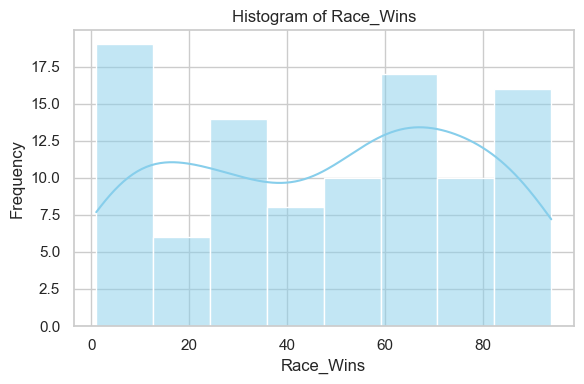

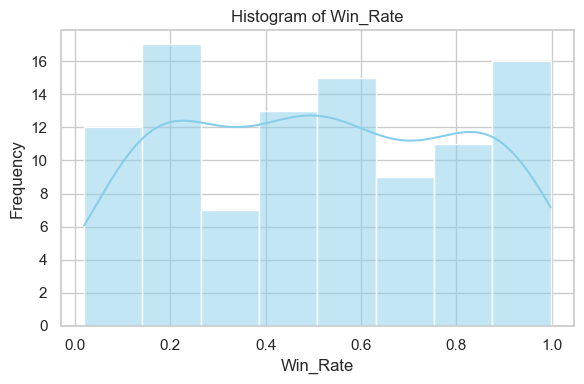

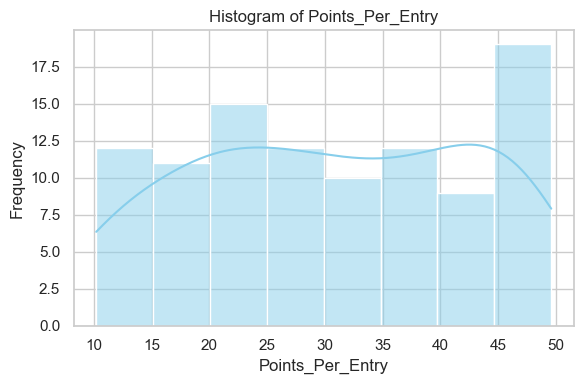

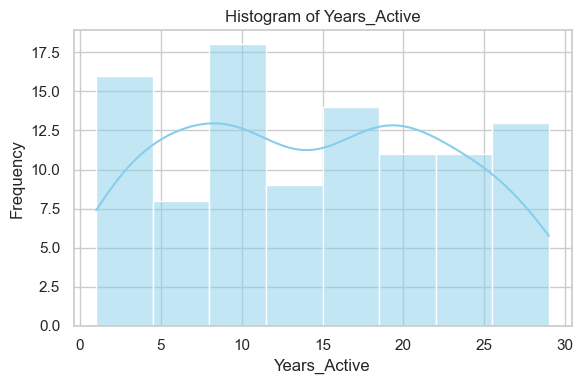

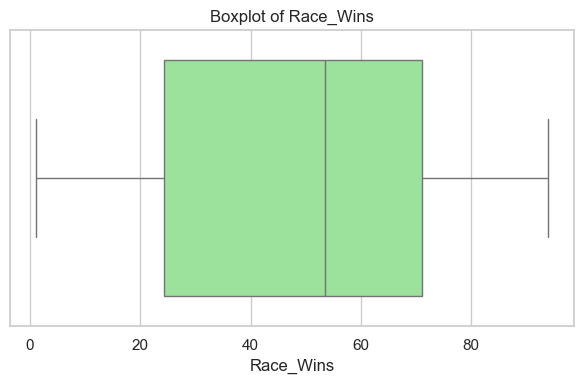

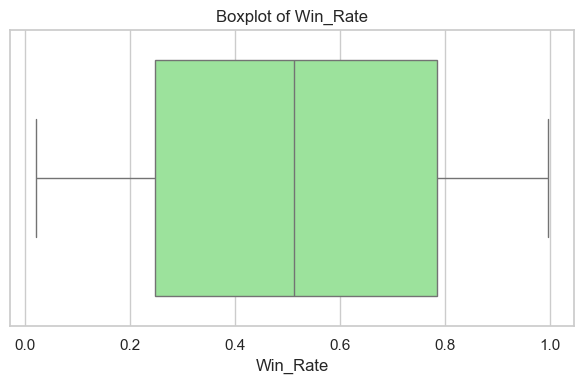

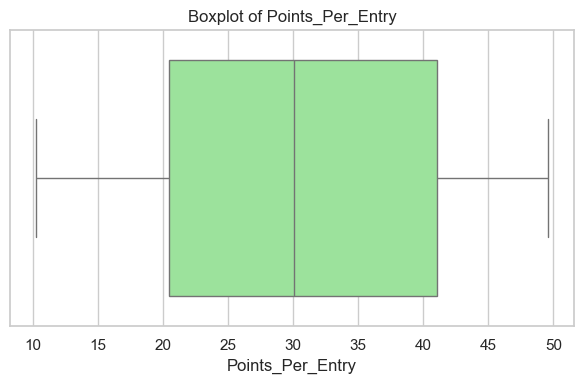

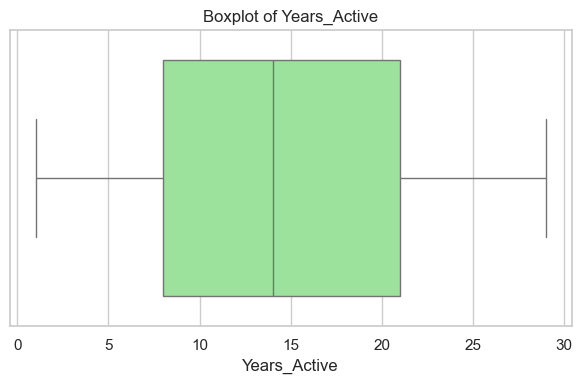

C:\Users\abhay\AppData\Local\Temp\ipykernel_11928\2471109917.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_vals.index, y=mean_vals.values, palette='viridis')


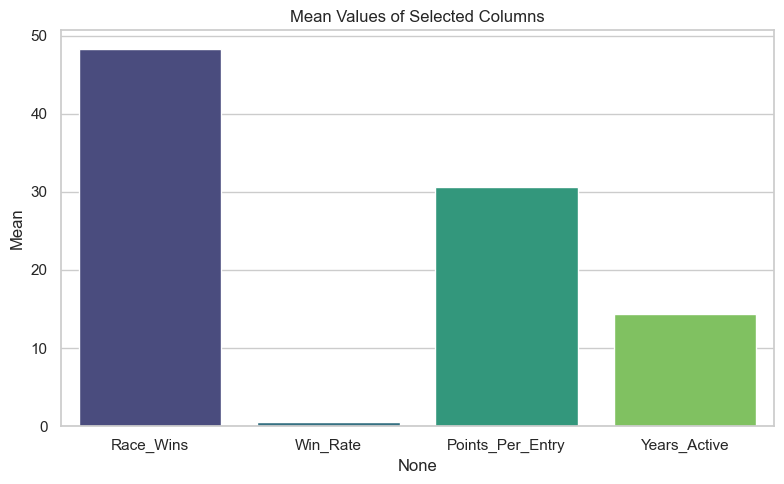

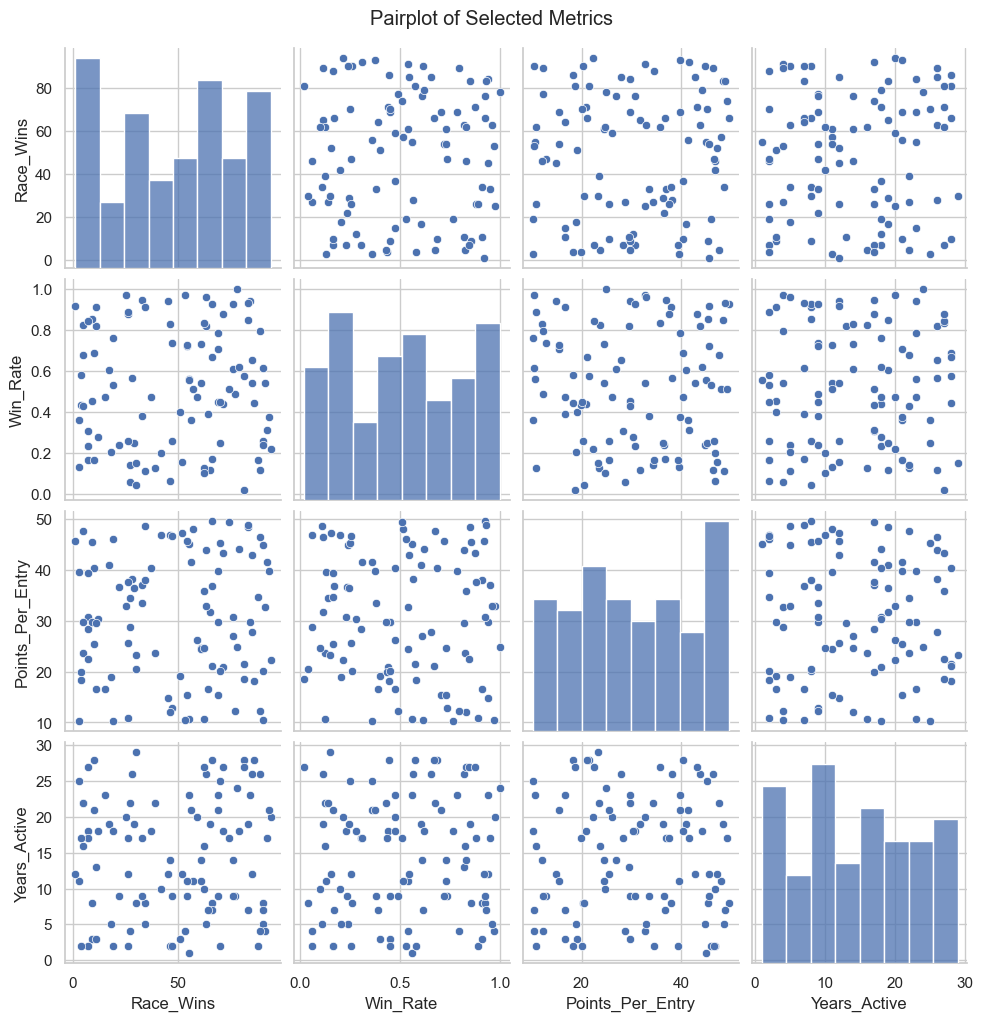

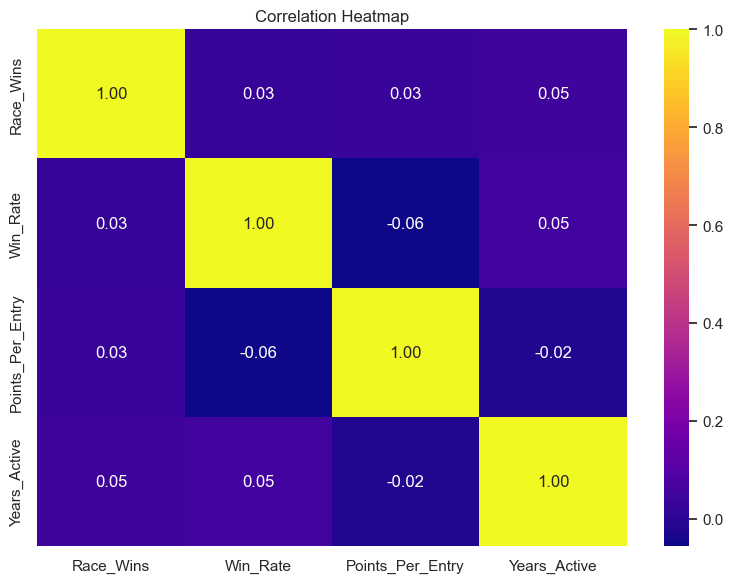

In [22]:
#  Cross-tabulation (if categorical column exists)
if 'Driver_Type' in df.columns:
    print("\nCross-tabulation (Driver_Type vs Years_Active):\n", pd.crosstab(df['Driver_Type'], df['Years_Active']))

#  Visuals
sns.set(style="whitegrid")

# Histogram
for col in cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Boxplot
for col in cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# Bar Chart (mean values)
mean_vals = df_selected.mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=mean_vals.index, y=mean_vals.values, palette='viridis')
plt.title('Mean Values of Selected Columns')
plt.ylabel('Mean')
plt.tight_layout()
plt.show()

# Pairplot
sns.pairplot(df_selected)
plt.suptitle("Pairplot of Selected Metrics", y=1.02)
plt.show()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_selected.corr(), annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()